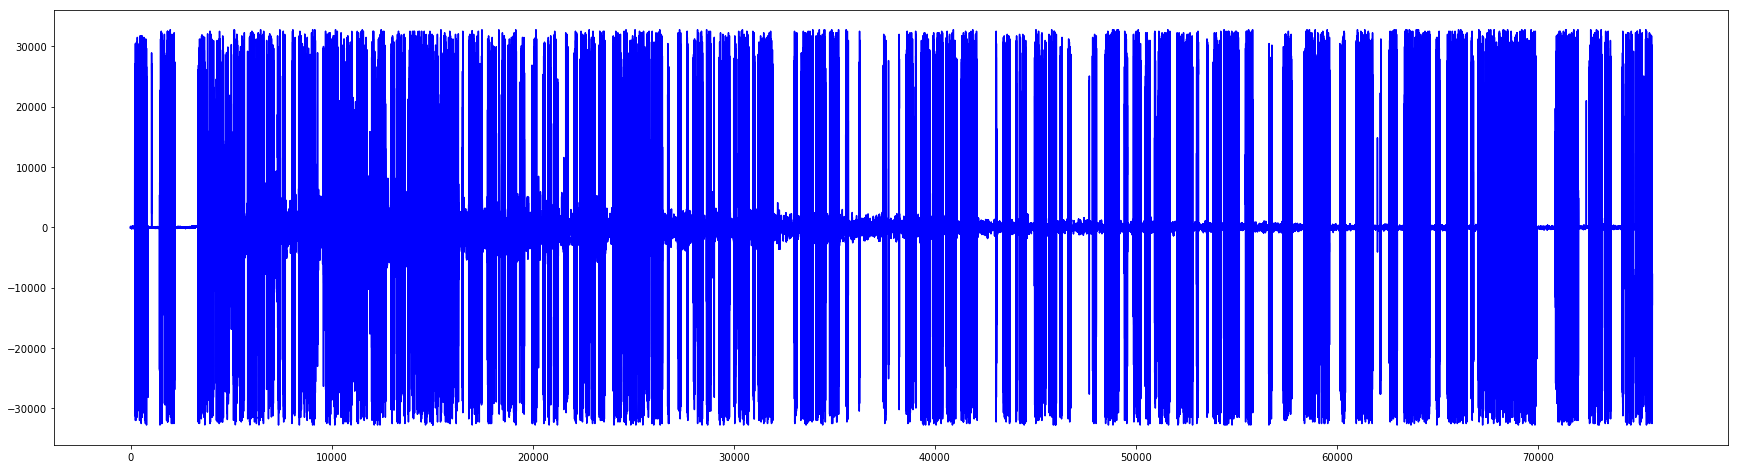

In [44]:
import numpy as np
import matplotlib.pyplot as plt
def problem1 (file):
    audio1=np.fromfile(file,dtype=np.int16)
    return audio1

audio1=problem1('churchdata')

fig=plt.figure(figsize=(30,8))
plt.plot(np.arange(0,len(audio1),1),audio1,color='b')
plt.show()
#Como que en el fondo se ve la señal de la imagen en la tarea, parece que tiene ruido.

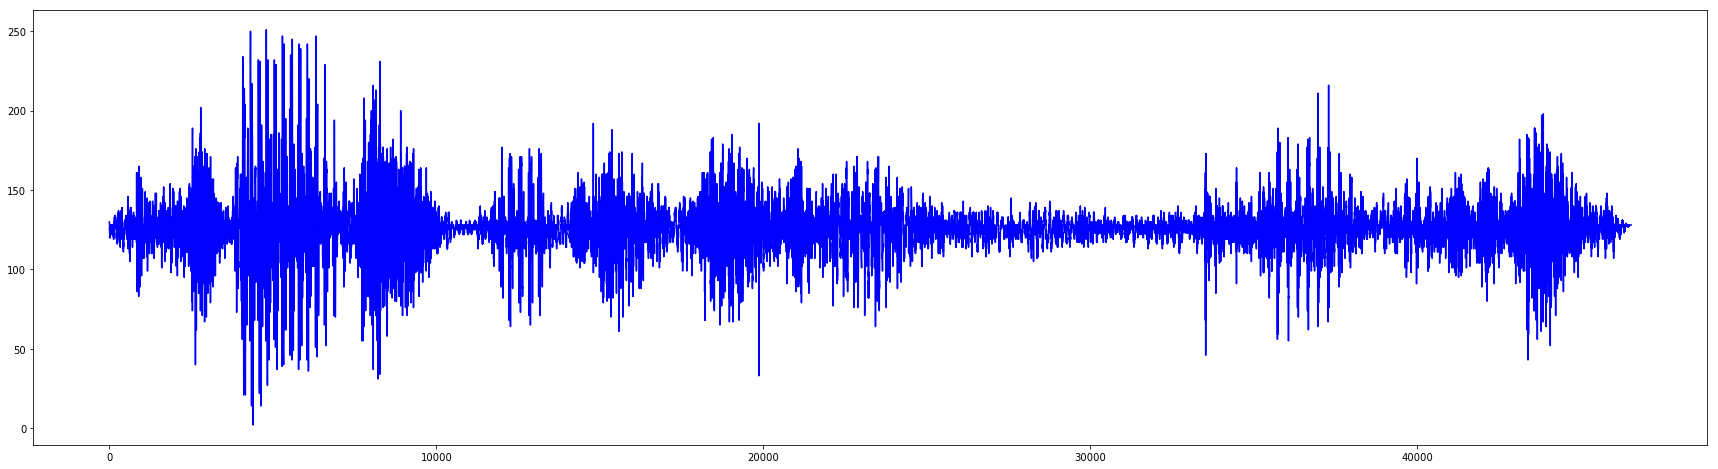

In [45]:
def problem2(file):
    audio2=np.fromfile(file,dtype=np.uint8)
    return audio2
audio2=problem2('obidata')
fig=plt.figure(figsize=(30,8))
plt.plot(np.arange(0,len(audio2),1),audio2,color='b')
plt.show()

In [46]:
import scipy.io.wavfile as wav
def problem3(x,y):
    wav.write('church.wav', 48000, x)
    #Se escucha como si mi bocina explotara xd, lo presentía desde que vi la gráfica.
    wav.write('obi.wav', 22050, y)
    #The Force will be with you. Always. -Obi.wav Kenobi
problem3(audio1,audio2)

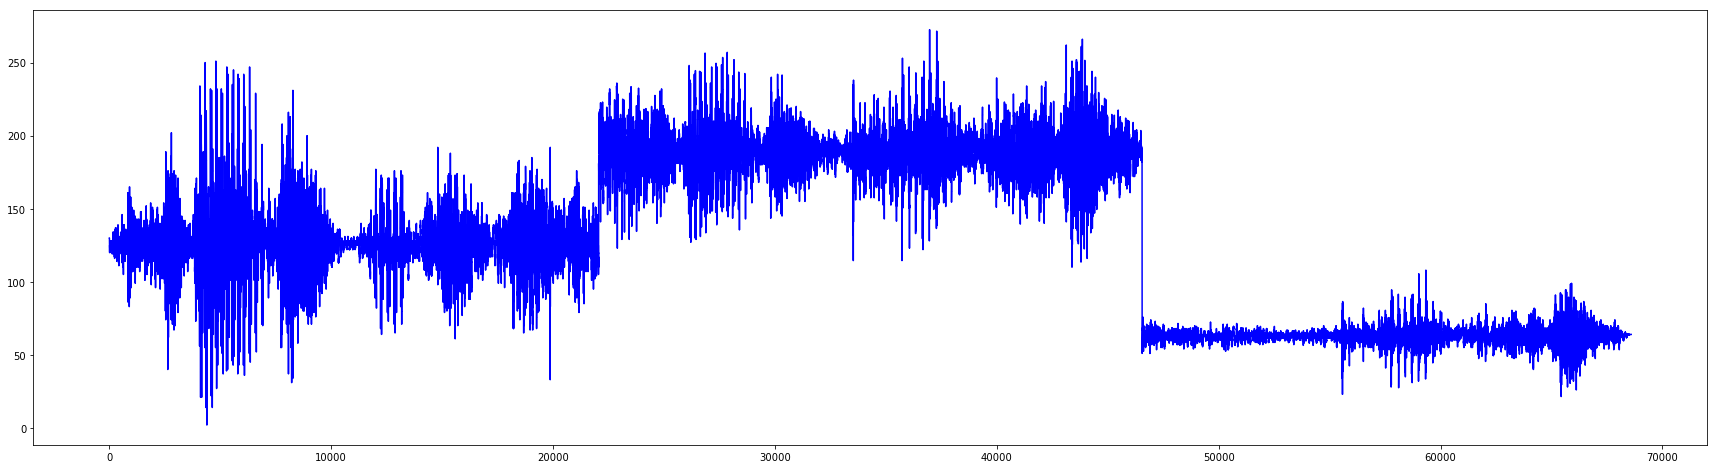

In [54]:
def problem4(audio,intEco,frec):
    #Creamos una convolución con la intensidad de eco que queramos
    convolucion=np.convolve(audio,intEco)
    eco=[]
    #Como el eco comienza a partir del primer segundo debemos agregarle u  segundo o 22050 frames
    for i in range(len(audio)+frec):
        #Al principio solo se escucha el sonido original
        if (i<=frec):
            eco.append(audio[i])
        #Después el sonido original y el eco, justo cuando pasa un segundo
        elif(i>frec and i<len(audio)):
            eco.append(audio[i]+convolucion[i-frec])
        #Finalmente solo queda el eco después de la duración del sonido original
        else:
            eco.append(convolucion[i-frec])
    eco=np.array(eco)
    return eco

eco=problem4(audio2,0.5,22050)

fig=plt.figure(figsize=(30,8))
plt.plot(np.arange(0,len(eco),1),eco,color='b')
plt.show()

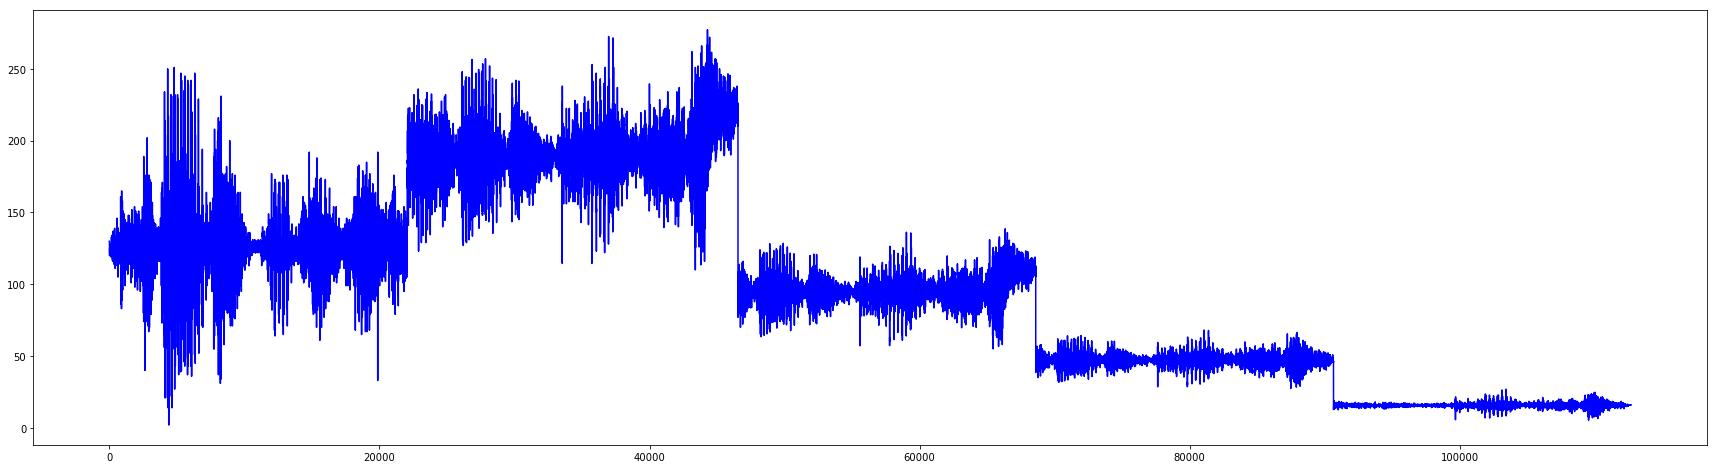

In [55]:
def problem5(audio,intEco,frec):
    #Creamos una convolución con la intensidad del segundo eco que queramos
    convolucion2=np.convolve(audio,intEco)
    eco2=[]
    #Como el eco comienza a partir del sugundo segundo (:v) debemos agregarle dos segundos o 22050*2 frames
    for i in range(len(audio)+frec*2):
        #Al principio solo se escucha el sonido original
        if (i<=frec*2):
            eco2.append(audio[i])
        #Después el sonido original y el segundo eco, justo cuando pasan dos segundo
        elif(i>2*frec and i<len(audio)):
            eco2.append(audio[i]+convolucion2[i-frec*2])
        #Finalmente solo queda el eco después de la duración del sonido original
        else:
            eco2.append(convolucion2[i-frec*2])
    eco2=np.array(eco2)
    return eco2

eco2=problem5(eco,0.25,22050)

fig=plt.figure(figsize=(30,8))
plt.plot(np.arange(0,len(eco2),1),eco2,color='b')
plt.show()


#La amplitud es demasiado alta para mis bocinas, por eso hago una convolución para reducirla 
#y lograr que se escuche

eco1Sonido=np.convolve(eco,0.001)
wav.write('eco.wav', 22050, eco1Sonido)

eco2Sonido=np.convolve(eco2,0.001)
wav.write('eco2.wav', 22050, eco2Sonido)


In [56]:
#Para el audio1
audio1Sonido=np.convolve(audio1,0.0001)
wav.write('church.wav', 22050, audio1Sonido)

#Jajaja suena igual pero más quedito, era de esperarse, la gráfica igual sale mal.

Introduce el número de ecos que quieres: 4
Número de ecos:  0


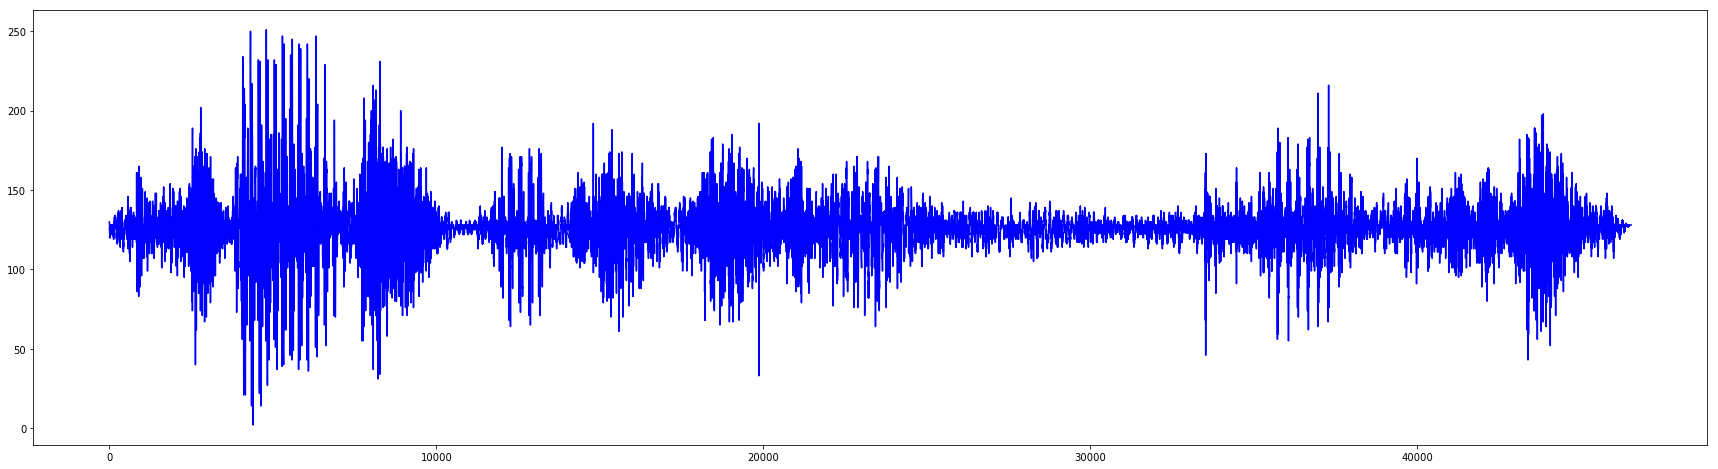

Número de ecos:  1


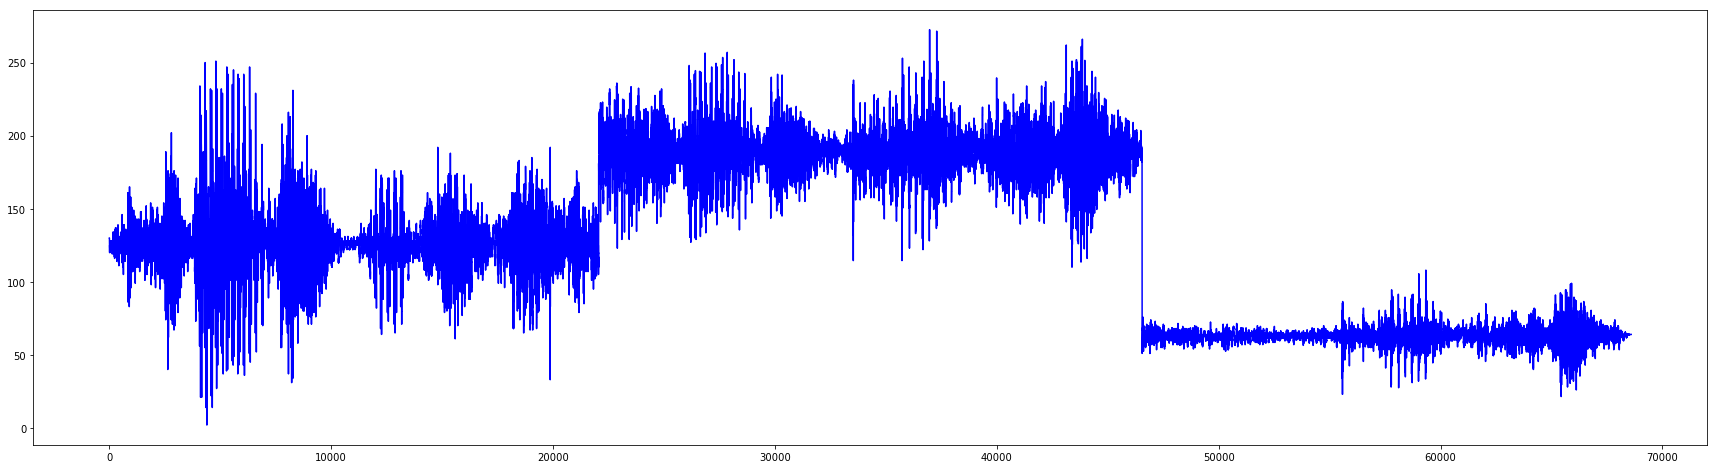

Número de ecos:  2


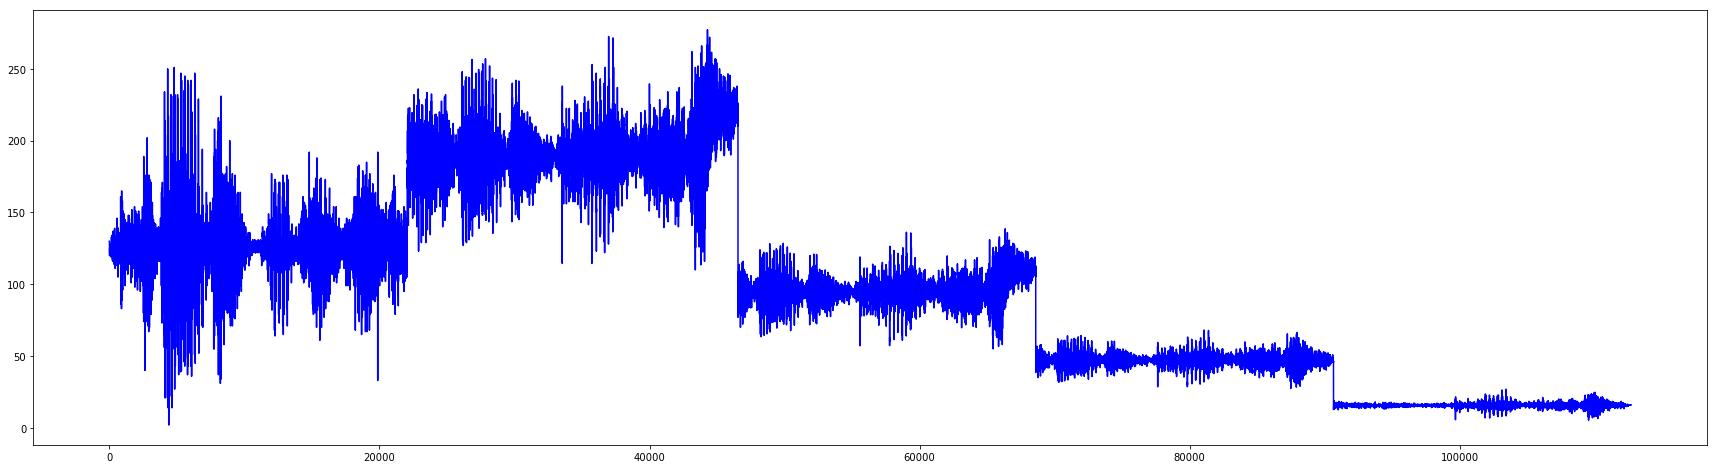

Número de ecos:  3


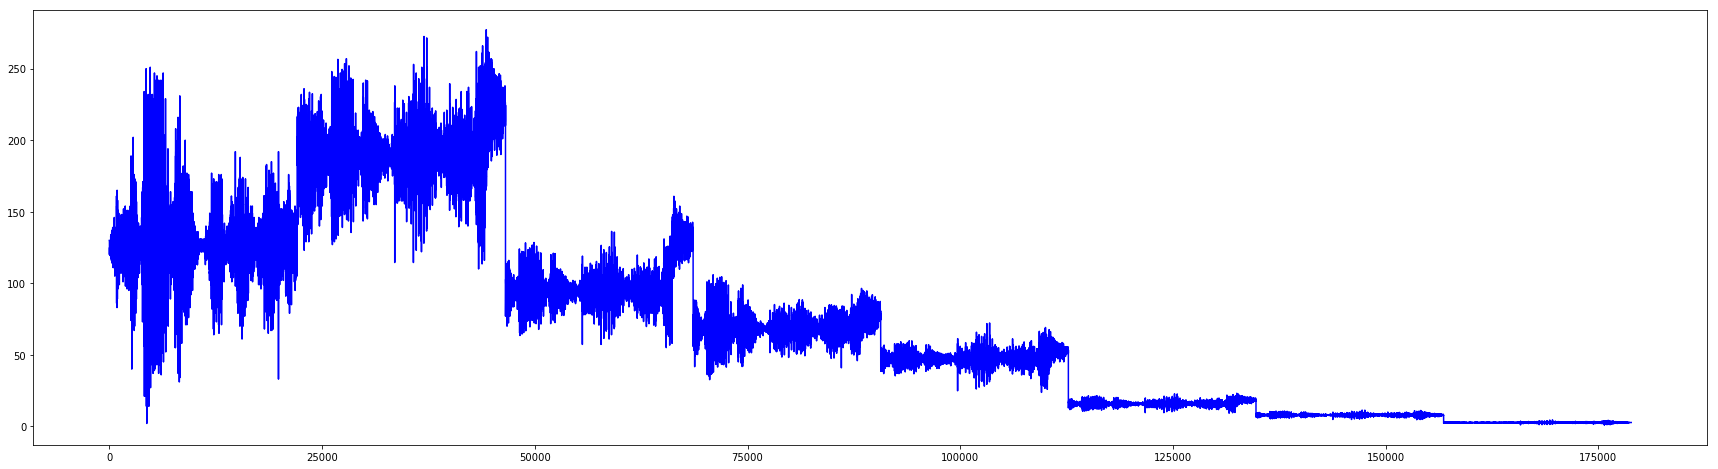

Número de ecos:  4


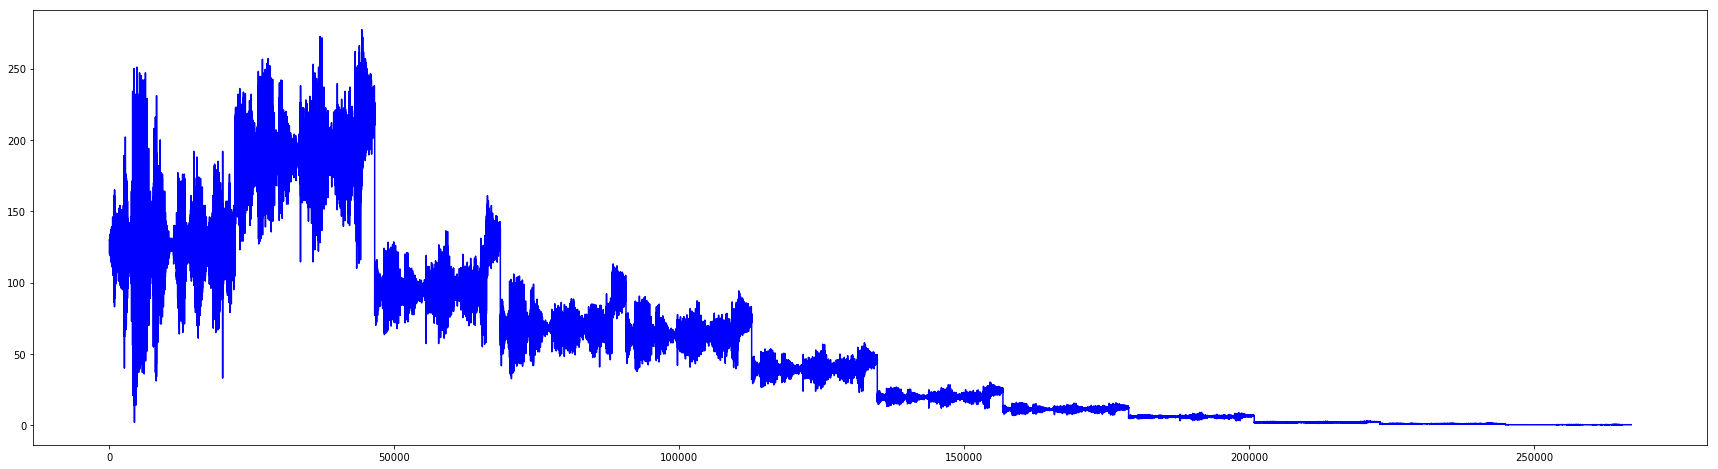

In [57]:
#Y una función quen devuelve la cantidad de ecos que quieras...
def problem6(audio,intEco,frec,ecos):
    numDeEco=1
    while (numDeEco<=ecos):
        audio=problem4(audio,intEco/numDeEco,frec*numDeEco)
        numDeEco+=1
    return audio
 
n=int(input("Introduce el número de ecos que quieres: "))+1
for i in range(n):
    eco5=problem6(audio2,0.5,22050,i)
    print('Número de ecos: ',i)
    fig=plt.figure(figsize=(30,8))
    plt.plot(np.arange(0,len(eco5),1),eco5,color='b')
    plt.show()
    
ecoNSonido=np.convolve(problem6(audio2,0.5,22050,n),0.001)
wav.write('ecoN.wav', 22050, ecoNSonido)